## 0 Load modules

In [1]:
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
import sys, re
import copy
import cartopy
import argparse
import glob, os
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

## 1 Load data
### 1.1 Load first part of the FRIS front

In [2]:
cvar      = 'votemper'
cfile1    = 'DATA/eORCA025.L121-OPM031_y2089.10y_FRIS1.nc'
ncid  = Dataset(cfile1)
ncid.set_auto_mask(False)
dat   = ncid.variables[cvar][:].squeeze()
dat = np.ma.masked_where(dat ==  0.0, dat)
cntU  = ncid.variables['vnorm'][:].squeeze()
dat1   = np.ma.masked_where((dat ==  0.0) | (np.abs(dat) >=  50.0) ,dat)
cntU1  = np.ma.masked_where((dat ==  0.0) | (np.abs(dat) >=  50.0) ,cntU)

lon1d1 = ncid.variables['nav_lon'][:].squeeze()
lat1d1 = ncid.variables['nav_lat'][:].squeeze()
dep1   = ncid.variables['gdepw_0'][:].squeeze()
ncid.close()

lon1=np.zeros(shape=dep1.shape)
for jk in range(0,dep1.shape[0]):
    lon1[jk,:]=lon1d1[:]

### 1.2 Load second part of the FRIS front

In [3]:
cfile2 = 'DATA/eORCA025.L121-OPM031_y2089.10y_FRIS2.nc'
ncid  = Dataset(cfile2)
ncid.set_auto_mask(False)
dat   = ncid.variables[cvar][:].squeeze()
dat = np.ma.masked_where(dat ==  0.0, dat)
cntU  = ncid.variables['vnorm'][:].squeeze()
dat2   = np.ma.masked_where((dat ==  0.0) | (np.abs(dat) >=  50.0) ,dat)
cntU2  = np.ma.masked_where((dat ==  0.0) | (np.abs(dat) >=  50.0) ,cntU)

lon1d2 = ncid.variables['nav_lon'][:].squeeze()
lat1d2 = ncid.variables['nav_lat'][:].squeeze()
dep2   = ncid.variables['gdepw_0'][:].squeeze()
ncid.close()

lon2=np.zeros(shape=dep2.shape)
for jk in range(0,dep2.shape[0]):
    lon2[jk,:]=lon1d2[:]

## 2 Plot figure 12c
### 2.1 define colormap

In [4]:
import cmocean
rmin      = -2.5; rmax = 3.0; rint = 0.5
vlevel= np.arange(rmin,rmax+0.000001,rint)
cmap  = cmocean.cm.thermal
normmap =colors.BoundaryNorm(vlevel, cmap.N)

### 2.2 define contours

In [5]:
lvlcnt=np.array([-0.5, -0.1, -0.05, -0.01, 0.0, 0.01, 0.05, 0.1, 0.5])*100
clrcnt=np.array([-1, -0.3, -0.075, -0.025, -0.005, 0.005, 0.025, 0.075, 0.3, 1])*100
mapcnt = plt.get_cmap('PiYG')
normcnt =colors.BoundaryNorm(clrcnt, mapcnt.N)

### 2.3 make plot

/var/folders/fj/r0q0fhhx4450585wlhdlw_s80000gn/T/ipykernel_2574/661691268.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcol = plt.pcolormesh(lon1[1:-1,0:-1], dep1[1:-1,0:-1], dat1[1:-1,0:-1], cmap=cmap, norm=normmap)
/var/folders/fj/r0q0fhhx4450585wlhdlw_s80000gn/T/ipykernel_2574/661691268.py:7: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pcol = plt.pcolormesh(lon2[1:-1,0:-1], dep2[1:-1,0:-1], dat2[1:-1,0:-1], cmap=cmap, norm=normmap)
/usr/local/anaconda3/envs/TiPACCs_plot/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1785: UserWarning: The input coordinates to pcolo

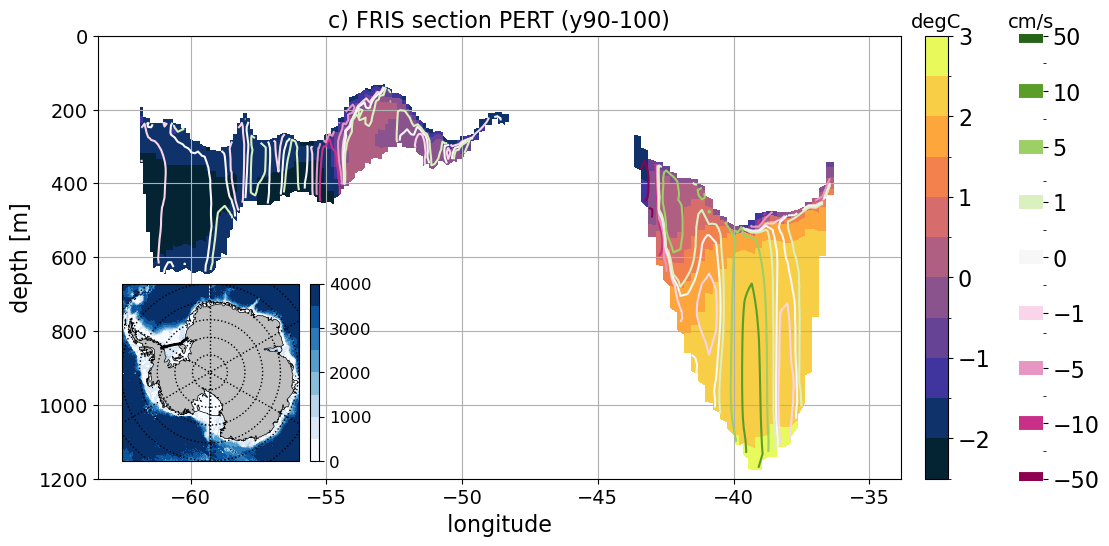

In [6]:
# make main plot
#===============
fig=plt.figure(figsize=np.array([300,150]) / 25.4)
ax   = plt.subplot(1,1,1)

pcol = plt.pcolormesh(lon1[1:-1,0:-1], dep1[1:-1,0:-1], dat1[1:-1,0:-1], cmap=cmap, norm=normmap)
pcol = plt.pcolormesh(lon2[1:-1,0:-1], dep2[1:-1,0:-1], dat2[1:-1,0:-1], cmap=cmap, norm=normmap)

cb_cnt=plt.contour(lon1[1:-1,0:-1], dep1[1:-1,0:-1], cntU1[1:-1,0:-1]*100, levels=lvlcnt, cmap=mapcnt, norm=normcnt)
cb_cnt=plt.contour(lon2[1:-1,0:-1], dep2[1:-1,0:-1], cntU2[1:-1,0:-1]*100, levels=lvlcnt, cmap=mapcnt, norm=normcnt)

ax.set_ylim([1200,0])
ax.set_xlim([min(lon1d1[0:-1]),max(lon1d2[0:-1])])

ax.grid(True)
ax.set_ylabel(' depth [m] '      ,fontsize=16)
ax.set_xlabel(' longitude ',fontsize=16)
ax.set_title('c) FRIS section PERT (y90-100)',fontsize=16)
ax.tick_params(labelsize=14)

# manage white space on the side
#===============================
plt.subplots_adjust(left=0.12, right=0.80 , bottom=0.15, top=0.9, hspace=0.4, wspace=0.1)

# plot inset
#===========
x0=1.0; x1=0.0; y0=1.0; y1=0.0
ax.apply_aspect()
zbox=ax.get_position()
box=[zbox.x0,zbox.x1,zbox.y0,zbox.y1]
x0=np.min([x0,box[0]])
x1=np.max([x1,box[1]])
y0=np.min([y0,box[2]])
y1=np.max([y1,box[3]])
boxxy=[x0, y0, x1, y1]

cax  = plt.axes([boxxy[2]+0.02, boxxy[1], 0.02, boxxy[3]-boxxy[1]])
cax.set_title('degC',fontsize=14)
cbar = plt.colorbar(pcol,cax=cax)
cbar.ax.tick_params(labelsize=16)

cax  = plt.axes([boxxy[2]+0.1, boxxy[1], 0.02, boxxy[3]-boxxy[1]])
cax.set_title('cm/s',fontsize=14)
cbar = plt.colorbar(cb_cnt,cax=cax)
cbar.outline.set_visible(False)
cbar.ax.tick_params(labelsize=16)
cbar.lines[0].set_linewidth(10)

left, bottom, width, height = [0.13, 0.18, 0.2, 0.3]
ax2 = fig.add_axes([left, bottom, width, height],projection=ccrs.Stereographic(central_latitude=-90.0, central_longitude=0.0))

ncid  = Dataset(cfile1)
lon   = ncid.variables['nav_lon'][:].squeeze()
lat   = ncid.variables['nav_lat'][:].squeeze()

ncid  = Dataset(cfile2)
lon2   = ncid.variables['nav_lon'][:].squeeze()
lat2   = ncid.variables['nav_lat'][:].squeeze()

ncid  = Dataset('mesh.nc')
dat   = ncid.variables['bathy_metry'][0,0:500,:].squeeze()
lon2d = ncid.variables['nav_lon'][0:500,:].squeeze()
lat2d = ncid.variables['nav_lat'][0:500,:].squeeze()

ax2.set_extent((-180, 180, -90, -65),ccrs.PlateCarree())
coast_features = cartopy.feature.NaturalEarthFeature('physical', 'coastline'                  , '50m',facecolor='0.75',edgecolor='k')
ax2.add_feature(coast_features,linewidth=0.5)
isf_features   = cartopy.feature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m',facecolor='none',edgecolor='k')
ax2.add_feature(isf_features  ,linewidth=0.5)

vlevel= np.arange(0,4000+0.000001,500)
cmap  = plt.get_cmap('Blues',len(vlevel)-1)
pcol  = plt.pcolormesh(lon2d, lat2d, dat, cmap=cmap, vmin=0, vmax=4000,transform=ccrs.PlateCarree())
cbar=plt.colorbar(pcol)
cbar.ax.tick_params(labelsize=12)
plt.plot(lon,lat,'k-',linewidth=2.0, transform=ccrs.PlateCarree())
plt.plot(lon2,lat2,'k-',linewidth=2.0, transform=ccrs.PlateCarree())

gl = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels= False,
                linewidth=1, color='k', linestyle=':')
gl.xlabels_top = False
gl.ylabels_right = False

fig.savefig('fig12c.png', format='png', dpi=150 )